In [97]:
#IMPORTAÇÃO DOS PACOTES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# ANÁLISE EXPLORATÓRIA

In [48]:
#IMPORTAÇÃO DAS TABELAS DE TREINO E DE TESTE E TRANSFORMANDO ELAS EM DATAFRAME POR MEIO DO MÉTODO DE PANDAS .READ_EXCEL() 

train_df = pd.read_excel('Data_Train.xlsx')
test_df = pd.read_excel('Test_set.xlsx')

In [49]:
#VISUALIZAÇÃO DAS PRIMEIRAS 5 LINHAS DA TABELA DE TREINO

train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [50]:
#VISUALIZAÇÃO DOS TIPOS DE DADOS EM CADA COLUNA E SE EXISTE VALOR NULO POR MEIO DO MÉTODO .INFO()

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [51]:
#VISUALIZAÇÃO DE ESTATÍSTICAS DAS VARIAVEIS COM MÉTODO .DESCRIBE()

train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [52]:
#SOMA DOS VALORES NULOS POR COLUNA

train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [53]:
#DELETA VALORES NULOS

train_df.dropna(inplace=True)

In [54]:
#VERIFICA ELIMINAÇÃO

train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [55]:
#VERIFICA VALORES DUPLICADOS

train_df[train_df.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [56]:
#ELIMINA VALORES DUPLICADOS

train_df.drop_duplicates(keep='first',inplace=True)

In [57]:
#VERIFICA DIMENSÕES 

train_df.shape

(10462, 11)

In [58]:
#TABELA DE FREQUÊNCIA DA VARIÁVEL 'ADDITIONAL_INFO'

train_df['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [59]:
#VERIFICA VALORES ÚNICOS PARA A VARIÁVEL 'AIRLINE'

train_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [60]:
train_df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [61]:
#VISUALIZAÇÃO DO CONJUNTO DE DADOS DE TESTE

test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [62]:
#ESTATÍSTICAS

test_df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [63]:
#INFORMAÇÕES

test_df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


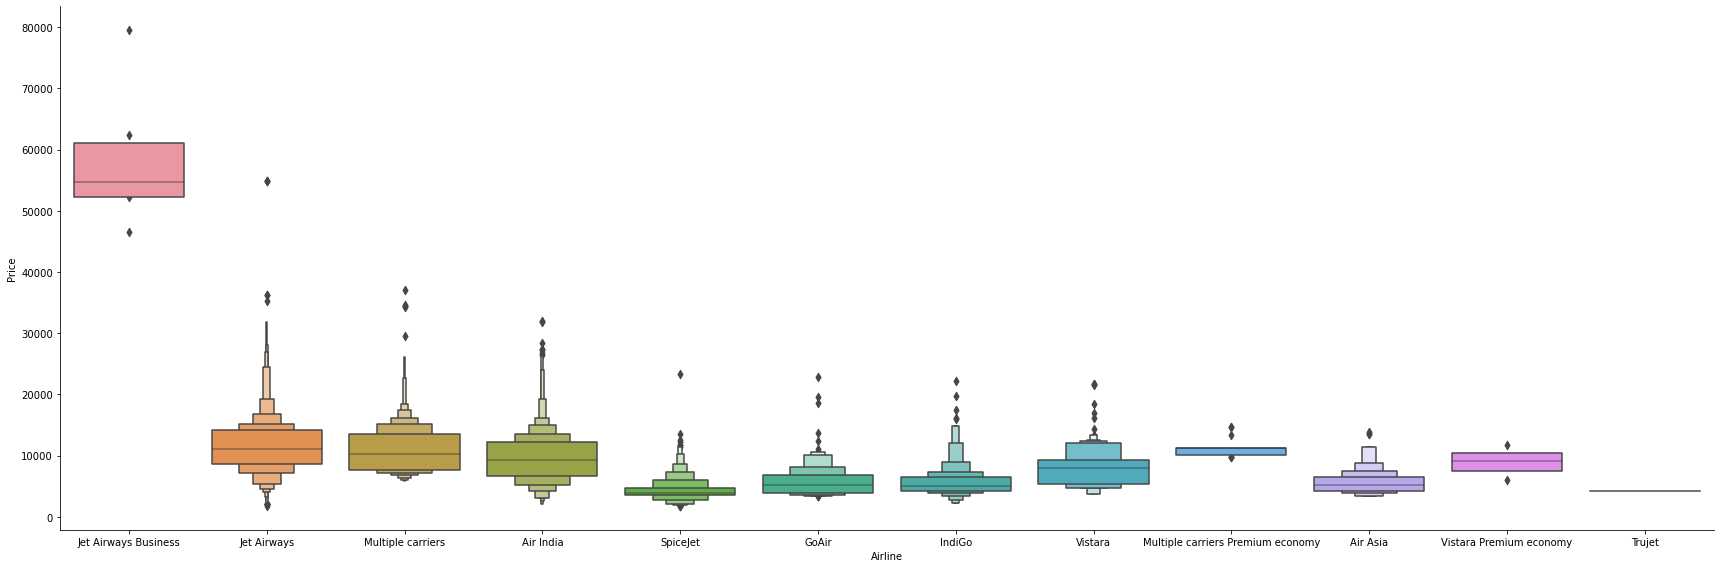

In [64]:
#GRÁFICO PRICE X AIRLINE

sns.catplot(y='Price',x='Airline',data=train_df.sort_values('Price',ascending=False),kind='boxen',height=8,aspect=3)
plt.show()

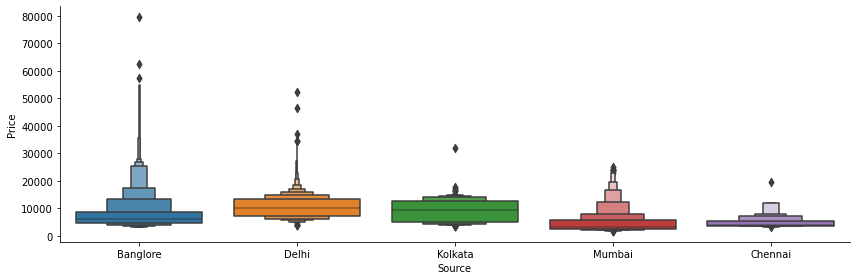

In [65]:
#GRÁFICO PRICE X SOURCE

sns.catplot(y='Price',x='Source',data=train_df.sort_values('Price',ascending=False),kind='boxen',height=4,aspect=3)
plt.show()

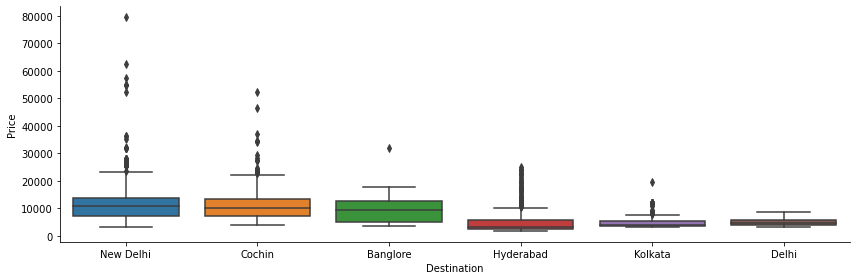

In [66]:
#GRÁFICO PRICE X Destination

sns.catplot(y='Price',x='Destination',data=train_df.sort_values('Price',ascending=False),kind='box',height=4,aspect=3)
plt.show()

# PROCESSAMENTO DE DADOS

In [67]:
#CONVERTENDO VARIÁVEL 'DURATION' EM MINUTOS

train_df['Duration'] = train_df['Duration'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_df['Duration'] = test_df['Duration'].str.replace("h",'*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [68]:
#CONVERTENDO VARIÁVEL DATAS(OBJETO) EM INT

train_df['Journey_day'] = train_df['Date_of_Journey'].str.split('/').str[0].astype(int)
train_df['Journey_month'] = train_df['Date_of_Journey'].str.split('/').str[1].astype(int)
train_df.drop(['Date_of_Journey'],axis=1,inplace=True)


In [69]:
#TEMPO

train_df['Dep_hour'] = pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['Dep_min'] = pd.to_datetime(train_df['Dep_Time']).dt.minute
train_df.drop(['Dep_Time'],axis=1,inplace=True)



In [70]:
train_df['Arrival_hour'] = pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df['Arrival_minute'] = pd.to_datetime(train_df.Arrival_Time).dt.minute
train_df.drop(['Arrival_Time'],axis=1,inplace=True)

test_df['Arrival_hour'] = pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df['Arrival_minute'] = pd.to_datetime(test_df.Arrival_Time).dt.minute
test_df.drop(['Arrival_Time'],axis=1,inplace=True)


In [71]:
#FAZER O MESMO PARA DATASET DE TESTE

test_df['Journey_day'] = test_df['Date_of_Journey'].str.split('/').str[0].astype(int)
test_df['Journey_month'] = test_df['Date_of_Journey'].str.split('/').str[1].astype(int)
test_df.drop(['Date_of_Journey'],axis=1,inplace=True)

test_df['Dep_hour'] = pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['Dep_min'] = pd.to_datetime(test_df['Dep_Time']).dt.minute
test_df.drop(['Dep_Time'],axis=1,inplace=True)

In [72]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Route            10462 non-null  object
 4   Duration         10462 non-null  int64 
 5   Total_Stops      10462 non-null  object
 6   Additional_Info  10462 non-null  object
 7   Price            10462 non-null  int64 
 8   Journey_day      10462 non-null  int32 
 9   Journey_month    10462 non-null  int32 
 10  Dep_hour         10462 non-null  int64 
 11  Dep_min          10462 non-null  int64 
 12  Arrival_hour     10462 non-null  int64 
 13  Arrival_minute   10462 non-null  int64 
dtypes: int32(2), int64(6), object(6)
memory usage: 1.1+ MB


In [73]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Route            2671 non-null   object
 4   Duration         2671 non-null   int64 
 5   Total_Stops      2671 non-null   object
 6   Additional_Info  2671 non-null   object
 7   Arrival_hour     2671 non-null   int64 
 8   Arrival_minute   2671 non-null   int64 
 9   Journey_day      2671 non-null   int32 
 10  Journey_month    2671 non-null   int32 
 11  Dep_hour         2671 non-null   int64 
 12  Dep_min          2671 non-null   int64 
dtypes: int32(2), int64(5), object(6)
memory usage: 250.5+ KB


Text(0, 0.5, 'Quantidade de voos')

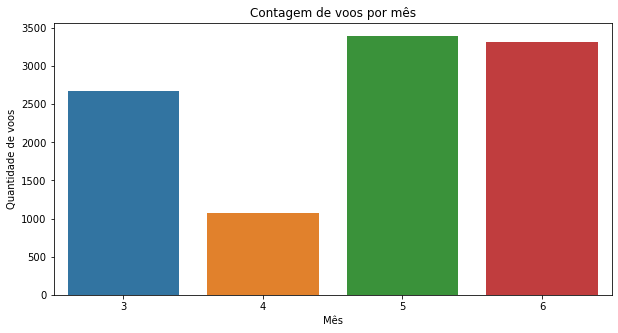

In [75]:
#GRÁFICO DE BARRAS PARA MESES (DURATION) VS NÚMERO DE VOOS

plt.figure(figsize=(10,5))
plt.title('Contagem de voos por mês')
ax=sns.countplot(x='Journey_month',data=train_df)
plt.xlabel('Mês')
plt.ylabel('Quantidade de voos')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

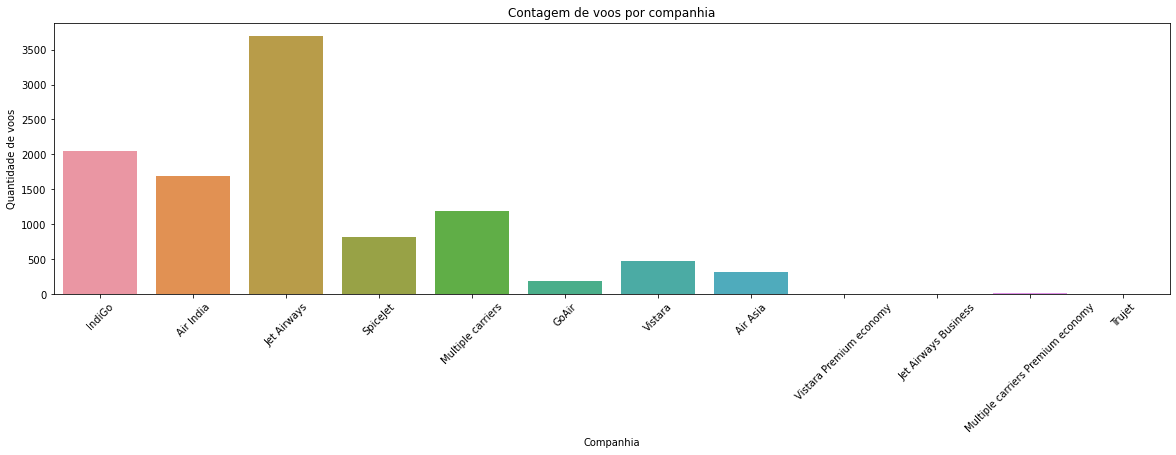

In [76]:
#GRÁFICO DE BARRAS PARA COMPANHIAS AÉREAS VS NÚMERO DE VOOS

plt.figure(figsize=(20,5))
plt.title('Contagem de voos por companhia')
ax=sns.countplot(x='Airline',data=train_df)
plt.xlabel('Companhia')
plt.ylabel('Quantidade de voos')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

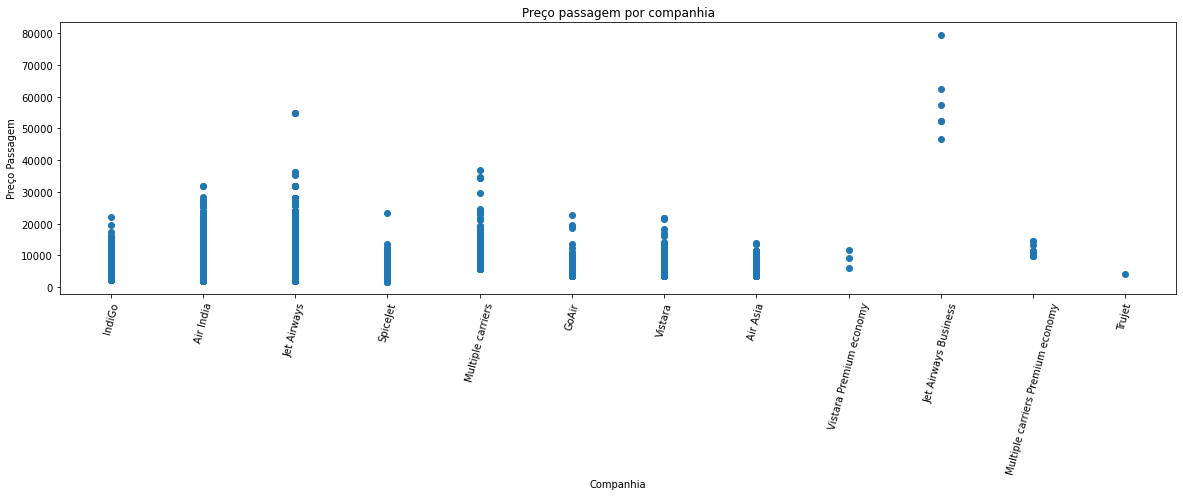

In [77]:
#GRÁFICO PARA COMPANHIAS AÉREAS VS PREÇO PASSAGEM

plt.figure(figsize=(20,5))
plt.title('Preço passagem por companhia')
plt.scatter(train_df['Airline'],train_df['Price'])
plt.xlabel('Companhia')
plt.ylabel('Preço Passagem')
plt.xticks(rotation=75)

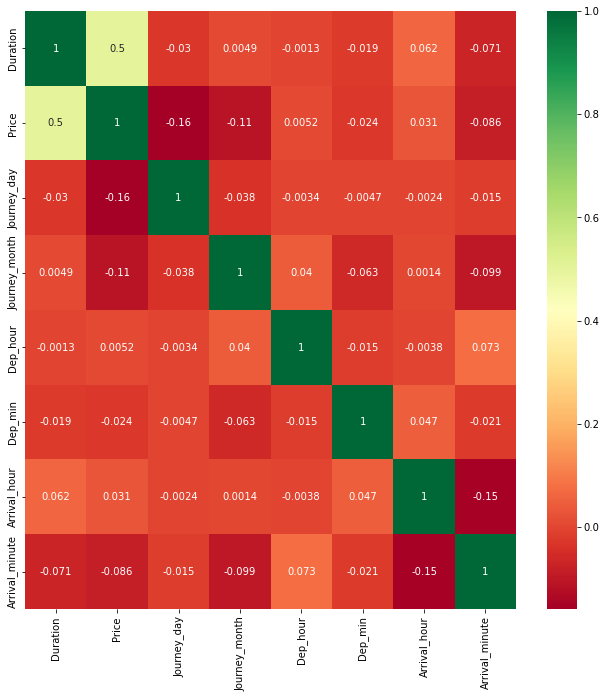

In [81]:
#GRÁFICO CORRELAÇÃO

plt.figure(figsize=(11,11))
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [82]:
#DELETANDO PREÇO
data = train_df.drop('Price',axis=1)

In [83]:
#SEPARANDO DADOS OBJETOS E NUMÉRICOS
train_categorical_data = data.select_dtypes(exclude=['int64','float','int32'])
train_numerical_data = data.select_dtypes(include=['int64','float','int32'])

test_categorical_data = test_df.select_dtypes(exclude=['int64','float','int32'])
test_numerical_data = test_df.select_dtypes(include=['int64','float','int32'])

In [84]:
#LABEL ENCODE E HOT ENCODE PARA COLUNAS CATEGÓRICAS

le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)

In [85]:
#CONCATENADNO DADOS CATEGORICOS E NUMERICOS 
X = pd.concat([train_categorical_data,train_numerical_data],axis=1)
y = train_df['Price']
test_set = pd.concat([test_categorical_data,test_numerical_data],axis=1)

In [86]:
#CALCULANDO MÉDIA ABSOLUTA DA PORCENTAGEM DE ERRO
def mean_absolute_percentage_error(y_true,y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [87]:
#SEPARAÇÃO DOS DADOS DE TREINO E DE TESTE
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

# CONSTRUÇÃO DE MÁQUINAS PREDITIVAS

In [91]:
#VALIDAÇÃO CRUZADA
#REALIZANDO GridSearchCV on DECISION TREE REGRESSION
depth = list(range(1,11))
param_grid = dict(max_depth = depth)

In [92]:
#LISTA DE HYPERPARAMETROS DA MÁQUINA PREDITIVA
tree = GridSearchCV(DecisionTreeRegressor(),param_grid,cv=10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [93]:
#PREVENDO RESULTADOS DE TREINO E DE TESTE
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [94]:
#QUAL MELHOR VALOR DE HYPERPARAMETRO DA LISTA DE 1 A 10 (MAX_DEPTH)?
tree.best_params_

{'max_depth': 10}

# AVALIAÇÃO DA MÁQUINA PREDITIVA

In [99]:
#AVALIAÇÃO COM DADOS DE TREINO
print('Resultados de treino pelo modelo Decision Tree Regressor: ')
print('Root Mean squared Error: ',sqrt(mse(y_train.values,y_train_pred)))
print('Mean absolute % error: ',round(mean_absolute_percentage_error(y_train.values,y_train_pred)))
print('R-Squared: ',r2_score(y_train.values,y_train_pred))

Resultados de treino pelo modelo Decision Tree Regressor: 
Root Mean squared Error:  1302.7097273603508
Mean absolute % error:  10
R-Squared:  0.9193244432696516


In [100]:
#AVALIAÇÃO COM DADOS DE TESTE
print('Resultados de teste pelo modelo Decision Tree Regressor: ')
print('Root Mean squared Error: ',sqrt(mse(y_test,y_test_pred)))
print('Mean absolute % error: ',round(mean_absolute_percentage_error(y_test,y_test_pred)))
print('R-Squared: ',r2_score(y_test,y_test_pred))

Resultados de teste pelo modelo Decision Tree Regressor: 
Root Mean squared Error:  2035.9037968583227
Mean absolute % error:  12
R-Squared:  0.8133172221471301
